### UTFPR - UNIVERSIDADE TECNOLÓGICA FEDERAL DO PARANÁ
### DAELT - DEPARTAMENTO ACADÊMICO DE ELETROTÉCNICA

**Disciplina**: ET7GF - Sinais e Sistemas 2

**Professor**: Glauber Brante

**Aluno**: Douglas Dangui Pedroso

---

## PROJETO FINAL
---

### Funções: ###

In [1]:
# Separação de Áudios
from numpy import *
from matplotlib.pyplot import *
from pyaudio import *
from scipy.io.wavfile import *
from scipy import signal
close('all')

### PARTE A: Detecção de Tons DTMF

DTMF (Dual-Tone Multi-Frequency) é uma codificação utilizada para envio de dados em um
canal de voz. Em especial, é bastante utilizada para a sinalização de telefones com teclas, utilizando
duas frequências simultâneas para cada dígito, conforme a Figura 1.

Para entender melhor sobre a geração das frequências DTMF, rode o exemplo dtmf_exemplo.py.
Para cada número de 0 a 9 digitado, o MATLAB tocará o som correspondente.

**TAREFAS:**
O script dtmf.py cria uma sequência de nove dígitos aleatórios, codifica esta sequência em
frequências DTMF, toca o som correspondente e plota seu espectrograma.

A partir deste código já fornecido:

1. Crie uma rotina para decodificar a sequência DTMF utilizando o algoritmo de Goertzel. Isto
é, a sua rotina deve reconhecer cada dígito e devolver a mesma sequência aleatória gerada no
início do código.

In [5]:
from numpy import *
from matplotlib.pyplot import *
from pyaudio import *
from random import randint

def goertzel(sinal, freq_amostragem, *freqs):
    """
    Implementação do algoritmo de Goertzel, útil para calcular termos individuais de uma DFT.
    'sinal' é um sinal unidimensional janelado amostrado na frequência de amostragem 'freq_amostragem'.
    A função retorna 2 vetores, um contendo as frequências calculadas e o segundo os coeficientes (parte real, imaginária e intensidade)
    para cada uma das frequências. Para análise espectral, apenas a intensidade é suficiente.
    """
    
    window_size = len(sinal)
    f_step = freq_amostragem / float(window_size)
    f_step_normalized = 1.0 / window_size

    bins = set()
    for f_range in freqs:
        f_start, f_end = f_range
        k_start = int(math.floor(f_start / f_step))
        k_end = int(math.ceil(f_end / f_step))

        if k_end > window_size - 1: raise ValueError('frequência fora do intervalo %s' % k_end)
        bins = bins.union(range(k_start, k_end))

    # Cálculo dos termos da DFT
    n_range = range(0, window_size)
    freqs = []
    results = []
    for k in bins:

        # cálculo dos coeficientes e das frequências
        f = k * f_step_normalized
        w_real = 2.0 * math.cos(2.0 * math.pi * f)
        w_imag = math.sin(2.0 * math.pi * f)

        d1, d2 = 0.0, 0.0
        for n in n_range:
            y  = sinal[n] + w_real * d1 - d2
            d2, d1 = d1, y

        # Alocação dos resultados (parte real, parte imaginaria, intensidade)
        results.append((
            0.5 * w_real * d1 - d2, w_imag * d1,
            d2**2 + d1**2 - w_real * d1 * d2)
        )
        freqs.append(f * freq_amostragem)
    return freqs, results

C:\Users\dglsd\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7674: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


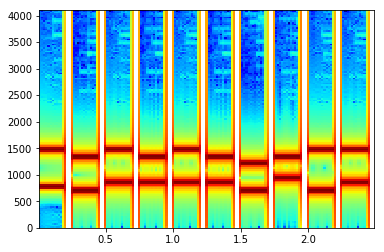

Sequência dada: [6, 2, 9, 8, 9, 8, 1, 0, 3, 9]
Sequência encontrada: [6, 2, 9, 8, 9, 8, 1, 0, 3, 9]


In [6]:
clf()
fs = 8196
n = arange(1, 0.2*fs)

# gera seq. aleatoria
seq = [randint(0, 9) for p in range(0, 10)]
seq2 = []
x=[]
for i in arange(0, size(seq)):
    symbol = seq[i]
    
    if symbol == 1:
        f1=697
        f2=1209
    elif symbol == 2:
        f1=697
        f2=1336;
    elif symbol == 3:
        f1=697
        f2=1477
    elif symbol == 4:
        f1=770
        f2=1209
    elif symbol == 5:
        f1=770
        f2=1336
    elif symbol == 6:
        f1=770
        f2=1477
    elif symbol == 7:
        f1=852
        f2=1209
    elif symbol == 8:
        f1=852
        f2=1336
    elif symbol == 9:
        f1=852
        f2=1477
    elif symbol == 0:
        f1=941
        f2=1336
    else:
        break
 
    y = 0.5*(sin(2*pi*f1*n/fs, dtype=float32) + sin(2*pi*f2*n/fs, dtype=float32))
    pausa = zeros(int(0.05*fs))
    x = concatenate((x, y, pausa), axis=0)
    
    # algoritmo de Goertzel
    freqs, results = goertzel(y, fs, (650, 950),  (1150, 1500))
    resultado = array(results)[:,2]
        
    modmaior = 0  
    for i in range(0,size(freqs)):
        if resultado[i] > modmaior:
            modmaior = resultado[i]
            f1 = freqs[i]
        if freqs[i] > 950:
            ind = i
            break
   
    for i in range(ind,size(freqs)):
        if resultado[i] > modmaior:
            modmaior = resultado[i]
            f2 = freqs[i]
    
    if f1 > 690 and f1 < 700 and f2 > 1200 and f2 < 1220:
        simbolo = 1
    elif f1 > 690 and f1 < 700 and f2 > 1330 and f2 < 1340:
        simbolo = 2
    elif f1 > 690 and f1 < 700 and f2 > 1470 and f2 < 1480:
        simbolo = 3
    elif f1 > 760 and f1 < 780 and f2 > 1200 and f2 < 1220:
        simbolo = 4
    elif f1 > 760 and f1 < 780 and f2 > 1330 and f2 < 1340:
        simbolo = 5
    elif f1 > 760 and f1 < 780 and f2 > 1470 and f2 < 1480:
        simbolo = 6
    elif f1 > 840 and f1 < 860 and f2 > 1200 and f2 < 1220:
        simbolo = 7
    elif f1 > 840 and f1 < 860 and f2 > 1330 and f2 < 1340:
        simbolo = 8
    elif f1 > 840 and f1 < 860 and f2 > 1470 and f2 < 1480:
        simbolo = 9   
    else:
        simbolo = 0
        
    seq2 = seq2 + [simbolo] 

# Espectrograma
figure(1)
specgram(x, Fs=fs, cmap='jet')
show()

# Audio
x = float32(x)    
p = PyAudio()
stream = p.open(format=paFloat32, channels=1, rate=fs, output=True)
stream.write(x, num_frames=size(x))
    
stream.stop_stream()
stream.close()
p.terminate()

print('Sequência dada:',seq)
print('Sequência encontrada:',seq2)

2. Crie um documento (formato relatório ou slides) contendo códigos, figuras geradas a partir de
seus códigos e explicação detalhada de sua solução.

A implementação do algoritmo acima para a **Tarefa A** foi a implementação do algoritmo de Goertzel adaptado da internet para o problema atual, cujo algoritmo consegue indicar algumas faixas de frequências.

Com as faixas de frequências foi criado uma condição, similar ao já dado, para encontrar os símbolos aleatórios obtidos no programa conforme mostra a resposta Sequência dada e Sequência encontrada.

### PARTE B: Separação de Sinais de Áudio

Nesta etapa iremos trabalhar com filtros FIR e IIR para fazer a separação de três sinais de áudio.
Os arquivos de áudio disponíveis são: musica.wav e canario.wav, além de um ruído em 400 Hz.
O primeiro representa o sinal de interesse, enquanto a frequência de 400 Hz e os pássaros representam
ruídos a serem removidos.

O script audios.py está dividido em 4 seções. Lembre-se se executar cada seção individualmente
para conseguir distinguir as etapas (CTRL+Enter ou “Executar a célula atual”).

Na primeira etapa, o script fornecido irá carregar o arquivo musica.wav, plotar os gráficos em
função do tempo e o espectrograma, além de tocar o som correspondente.

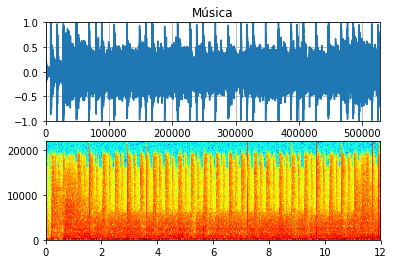

In [8]:
def sound(x, fs):
    p = PyAudio()
    stream = p.open(format=paFloat32, channels=1, rate=fs, output=True)
    stream.write(x, num_frames=size(x))
    
    stream.stop_stream()
    stream.close()
    p.terminate()
    return


##########################
# PRIMEIRA ETAPA: Musica #
##########################
fs1, x1 = read('musica.wav')
# Transforma Stereo em Mono
x1 = (x1[:,0] + x1[:,1])/2
x1 = float32(x1/max(abs(x1)))

sound(x1,fs1)

n = arange(size(x1))

figure(1)
subplot(2,1,1)
plot(n,x1)
grid(True)
title('Música')
axis([min(n), max(n), -1, 1])
subplot(2,1,2)
specgram(x1, Fs=fs1, cmap='jet')
show()

Na segunda etapa, o script irá gerar um ruído em 400 Hz, plotando o gráfico em função do
tempo e o espectrograma, tocando o áudio correspondente.

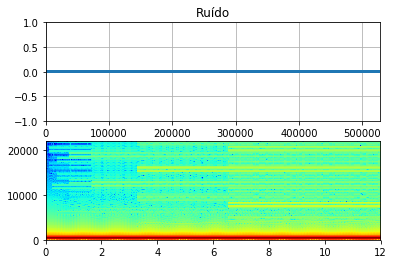

In [9]:
########################
# SEGUNDA ETAPA: Ruído #
########################
fs2 = 44100
f = 400
x2 = 0.1*sin(2*pi*f/fs2*n, dtype=float32)
sound(x2, fs2)

figure(2)
subplot(2,1,1)
plot(n,0.1*x2)
grid(True)
title('Ruído')
axis([min(n), max(n), -1, 1])
subplot(2,1,2)
specgram(x2, Fs=fs2,cmap='jet')
show()

Na terceira etapa, o código fará a leitura do arquivo canario.wav, plotando o gráfico em
função do tempo e o espectrograma, tocando o áudio correspondente.

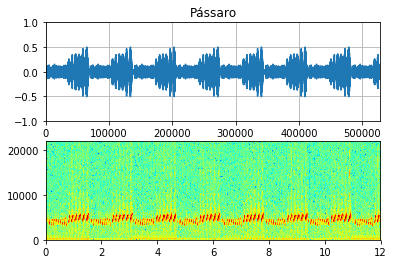

In [10]:
###########################
# TERCEIRA ETAPA: Pássaro #
###########################
fs3, x3 = read('canario.wav')
x3 = float32(0.5*(x3/max(abs(x3))))

# Ajusta vetor de ruído para mesmo tamanho do vetor da música
if size(x3) < size(x1):
    x3 = float32(append(x3, zeros(size(x1)-size(x3))))
else:
    x3 = float32(x3[0:size(x1)])

sound(x3,fs3)

figure(3)
subplot(2,1,1)
plot(n,x3)
grid(True)
title('Pássaro')
axis([min(n), max(n), -1, 1])
subplot(2,1,2)
specgram(x3, Fs=fs3,cmap='jet')
show()

Por fim, a quarta etapa soma os três sinais (repare que é necessário ajustar os tamanhos
dos arquivos para serem compatíveis), plota em função do tempo e espectrograma, no qual
podemos identificar sinal e ruídos misturados.

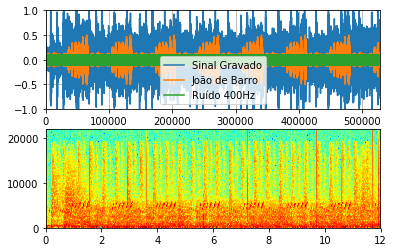

In [11]:
#########################
# Adicionando os Sinais #
#########################
x = x1 + x2 + x3
sound(x, fs1)  # Música com Ruidos

figure(4)
subplot(2,1,1)
plot(n,x)
plot(n,x3)
plot(n,x2)
grid(True)
legend(('Sinal Gravado','João de Barro','Ruído 400Hz'))
axis([min(n), max(n), -1, 1])
subplot(2,1,2)
specgram(x,Fs=fs1,cmap='jet')
show()

**TAREFAS:**

1) Analise os espectrogramas para determinar quais as faixas de frequência são dominadas pelo
som dos pássaros e quais são dominadas pelo áudio musical.

2) Elimine a frequência de 400 Hz antes de iniciar o resto do processamento. Estude o filtro notch
em seu formato IIR e formas de implementá-lo. No relatório final, explique o funcionamento
desse filtro e a solução adotada.

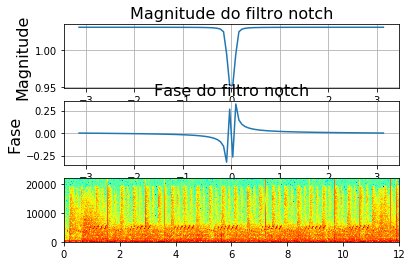

In [13]:
clf()
fc = 400
r = 0.99
b = [1, -2*cos(2*pi*fc/fs1), 1]        
a = [1, -2*r*cos(2*pi*fc/fs1), r**2]    
b = b/sum(b)*sum(a)
y = float32(signal.lfilter(b,a,x))
sound(y,fs1)

w = linspace(-pi, pi, 100)
W, H = signal.freqz(b, a, w)

figure(1,figsize=[15,11.50])
subplot(3, 1, 1)
plot(W,abs(H))
ylabel('Magnitude', fontsize = 16)
title('Magnitude do filtro notch', fontsize = 16)
grid(True)
subplot(3, 1, 2)
plot(W, angle(H))
xlabel('$\omega$', fontsize = 16)
ylabel('Fase', fontsize = 16)
title('Fase do filtro notch', fontsize = 16)
grid(True)
subplot(3, 1, 3)
specgram(x,Fs=fs1,cmap='jet')
show()

**Explicação:**

Para eliminar a frequência de 400Hz da música fora usado um filtro notch IIR de segunda ordem conforme pode-se notar pelos coeficientes a e b.
Basicamente fez-se a resposta em frequência para analisar o desempenho do filtro conforme indicam as duas primeiras figuras. Após, usou-se a função lfilter com o sinal da música e os coeficientes para obter o som sem o ruído de 400Hz.


3) Crie um filtro FIR para obter apenas a música a partir do sinal de áudio combinado. Plote o
espectrograma correspondente e toque o som obtido.

C:\Users\dglsd\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.fft(a, n, axis)
C:\Users\dglsd\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part


Coeficiente N do filtro: 801


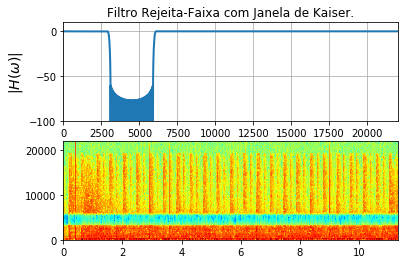

In [25]:
Ar = 60
wp1 = 2900
wr1 = 3100
wr2 = 5900
wp2 = 6100
ws = fs1

# Determinação das duas frequências de corte centralizadas na faixa de transição
Tr = min(abs(wr1-wp1),abs(wr2-wp2))
wc1 = wp1 + Tr/2
wc2 = wp2 - Tr/2

tam_fft = 500000
f = linspace(0, ws, tam_fft)    
[N, beta] = signal.kaiserord(Ar,Tr/(0.5*ws))
h = signal.firwin(N,[wc1,wc2],nyq=ws/2,width=Tr,window=('kaiser',beta))
H = fft.fft(h,tam_fft)
mag = 20*log10(abs(H))

Y = fft.fft(y,tam_fft);
Y2 = Y*H
y2 = float32(fft.ifft(Y2));
sound(y2,fs1)

clf()
figure(1)
subplot(2,1,1)
plot(f, mag,lineWidth=2)
axis([0, ws/2, -100, 10])
title('Filtro Rejeita-Faixa com Janela de Kaiser.')
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)|$',fontsize=14)
grid(True)
subplot(2,1,2)
specgram(y2,Fs=fs1,cmap='jet');

print('Coeficiente N do filtro:',N)

**Explicação**

Utilizou-se de um filtro FIR através da janela de Kaiser com o auxílio das linhas kaiserord que dá como resultado a ordem N do filtro e o coeficiente beta. Já que é através do método da janela de Kaiser que se obtém o número de coeficiente dos filtro.

Em seguida usou-se firwin para obter o filtro desejado com a ordem N dada. Adotou-se como eliminação da faixa de frequência de 3000Hz à 6000Hz através de um filtro Rejeita-Faixa. Isso pode ser indicado pela música tocada e pelo Specgram.

4) Crie um filtro FIR para obter apenas o canto dos pássaros a partir do sinal de áudio combinado.
Plote o espectrograma correspondente e toque o som obtido.

C:\Users\dglsd\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.fft(a, n, axis)
C:\Users\dglsd\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part


Coeficiente N do filtro: 2522


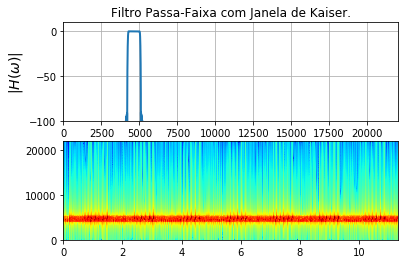

In [24]:
Ar = 90
wp1 = 4200
wr1 = 4100
wr2 = 5200
wp2 = 5100
ws = fs1

# Determinação das duas frequências de corte centralizadas na faixa de transição
Tr = min(abs(wr1-wp1),abs(wr2-wp2))
wc1 = wp1 + Tr/2
wc2 = wp2 - Tr/2

tam_fft = 500000
f = linspace(0, ws, tam_fft)    
[N, beta] = signal.kaiserord(Ar,Tr/(0.5*ws))
h = signal.firwin(N,[wc1,wc2],nyq=ws/2,width=Tr,window=('kaiser',beta),pass_zero=False)
H = fft.fft(h,tam_fft)
mag = 20*log10(abs(H))

Y = fft.fft(y,tam_fft)
Y2 = Y*H
y2 = float32(fft.ifft(Y2))
sound(y2,fs1)

clf()
figure(1)
subplot(2,1,1)
plot(f, mag,lineWidth=2)
axis([0, ws/2, -100, 10])
title('Filtro Passa-Faixa com Janela de Kaiser.')
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)|$',fontsize=14)
grid(True)
subplot(2,1,2)
specgram(y2,Fs=fs1,cmap='jet');

print('Coeficiente N do filtro:',N)

**Explicação:**

O problema resolvido nesta parte foi justamente o oposto do problema acima:

Utilizou-se de um filtro FIR através da janela de Kaiser com o auxílio das linhas kaiserord que dá como resultado a ordem N do filtro e o coeficiente beta.

Em seguida usou-se firwin para obter o filtro desejado com a ordem N dada. Adotou-se o critério para permitir apenas a passagem da faixa de frequência de 3000Hz à 6000Hz através de um filtro Passa-Faixa. Isso pode ser indicado pela música tocada, pelo Specgram e pela resposta em frequência do filtro projetado.

5) Repita os itens 3 e 4 utilizando filtros IIR.

C:\Users\dglsd\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


Coeficiente N do filtro: 15


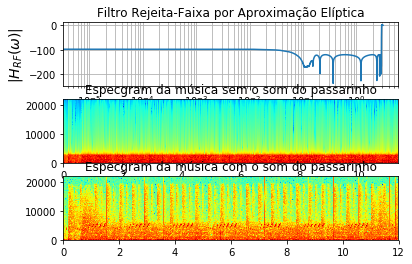

In [27]:
Ap = 0.001
Ar = 120

wp1 = pi*100/fs1
wr1 = pi*500/fs1
wr2 = pi*13000/fs1
wp2 = pi*13200/fs1

N, wc = signal.ellipord([wp1,wp2],[wr1,wr2],Ap,Ar,analog=False)
b,a = signal.ellip(N,Ap,Ar,wc,btype='bandstop',analog=False)
w1, H1 = signal.freqz(b,a,worN=500000)
tam_fft = size(H1)
mag = 20*log10(abs(H1))

Y = fft.fft(y,tam_fft)
Y2 = Y*H1
y2 = float32(fft.ifft(Y2))
sound(y2,fs1) 

clf()
subplot(3,1,1)
semilogx(w1,20*log10(abs(H1)));
title('Filtro Rejeita-Faixa por Aproximação Elíptica')
grid(True,which='both')
ylabel('$|H_{RF}(\omega)|$',fontsize=14)
xlabel('$\omega$',fontsize=14)
subplot(3,1,2)
specgram(y2,Fs=fs1,cmap='jet');
title('Especgram da música sem o som do passarinho')
subplot(3,1,3)
title('Especgram da música com o som do passarinho')
specgram(y,Fs=fs1,cmap='jet');
print('Coeficiente N do filtro:',N)

**Explicação:**

Para esta parte, utilizou-se de um filtro IIR através da aproximação elíptica com o auxílio das linhas ellipord que dá como resultado a ordem N do filtro e o coeficiente corte de frequência wc.

Em seguida usou-se ellip para obter o filtro desejado com a ordem N dada. Adotou-se o critério para permitir apenas a rejeição da faixa de frequência de 3000Hz à 6000Hz através de um filtro Rejeita-Faixa. Isso pode ser indicado pela música tocada, pelo Specgram e pela resposta em frequência do filtro projetado.

Entretanto, como pode-se notar, a obtenção do resultado pelo filtro IIR fora muito inferior em qualidade se comparado ao método FIR.
Este fato deveu-se ao motivo de que o autor não conseguiu entender por completo o uso das linhas de código ellip e ellipord.
Na explicação da função na página do Python, indica que as frequências utilizadas são uma faixa entre 0 e 1, sendo 1 para a frequência de amostragem.
A explicação da função também indica que as frequências utilizadas como entrada são dadas através de meio ciclo da freq/amostragem, ou seja, o autor entendeu que as frequências de entrada seriam da seguinte forma:

\begin{equation}
\large
    wc[n] = \pi\frac{fc}{fs}
\end{equation}

Entretanto, como pode-se notar pelas figuras, essa não é a forma correta do uso, já que pelo specgram o filtro Rejeita-Faixa não rejeitou a faixa desejada que era de 3000Hz a 6000Hz.



C:\Users\dglsd\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


Coeficiente N do filtro: 9


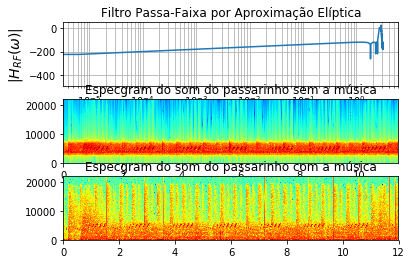

In [29]:
Ap = 0.001
Ar = 120

wp1 = pi*12000/fs1
wr1 = pi*11000/fs1
wr2 = pi*14000/fs1
wp2 = pi*13000/fs1

N, wc = signal.ellipord([wp1,wp2],[wr1,wr2],Ap,Ar,analog=False)
b,a = signal.ellip(N,Ap,Ar,wc,btype='bandpass',analog=False)
w1, H1 = signal.freqz(b,a,worN=500000)
tam_fft = size(H1)
mag = 20*log10(abs(H1))

Y = fft.fft(y,tam_fft)
Y2 = Y*H1
y2 = float32(fft.ifft(Y2))
sound(y2,fs1) 

clf()
subplot(3,1,1)
semilogx(w1,20*log10(abs(H1)));
title('Filtro Passa-Faixa por Aproximação Elíptica')
grid(True,which='both')
ylabel('$|H_{RF}(\omega)|$',fontsize=14)
xlabel('$\omega$',fontsize=14)
subplot(3,1,2)
specgram(y2,Fs=fs1,cmap='jet');
title('Especgram do som do passarinho sem a música')
subplot(3,1,3)
title('Especgram do som do passarinho com a música')
specgram(y,Fs=fs1,cmap='jet');  

print('Coeficiente N do filtro:',N)

**Explicação:**

Para esta parte, utilizou-se de um filtro IIR através da aproximação elíptica com o auxílio das linhas ellipord que dá como resultado a ordem N do filtro e o coeficiente corte de frequência wc.

Em seguida usou-se ellip para obter o filtro desejado com a ordem N dada. Adotou-se o critério para permitir apenas a passagem da faixa de frequência de 3000Hz à 6000Hz através de um filtro Passa-Faixa. Isso pode ser indicado pela música tocada, pelo Specgram e pela resposta em frequência do filtro projetado.

Entretanto, como pode-se notar, a obtenção do resultado pelo filtro IIR fora muito inferior em qualidade se comparado ao método FIR.
Este fato deveu-se ao motivo de que o autor não conseguiu entender por completo o uso das linhas de código ellip e ellipord.
Na explicação da função na página do Python, indica que as frequências utilizadas são uma faixa entre 0 e 1, sendo 1 para a frequência de amostragem.
A explicação da função também indica que as frequências utilizadas como entrada são dadas através de meio ciclo da freq/amostragem, ou seja, o autor entendeu que as frequências de entrada seriam da seguinte forma:

\begin{equation}
\large
    wc[n] = \pi\frac{fc}{fs}
\end{equation}

Entretanto, como pode-se notar pelas figuras, essa não é a forma correta do uso, já que pelo specgram o filtro Passa-Faixa rejeitou a faixa desejada que era de 3000Hz a 6000Hz, mas a indicação das frequências no código foram sem sentido, aparentemente, conforme nota-se pelas 4 frequências estipuladas no código acima.

6) O que se pode concluir comparando-se o áudio musica.wav original e o áudio obtido após a
filtragem do áudio combinado?

R: Uma parte da informação é perdida devido ao filtro visto que uma pequena parte da música está entre a faixa de frequência de rejeição de 3000Hz à 6000Hz, que é a faixa removida do aúdio do pássaro. A intensidade da música também é levemente alterada.

Quanto ao uso dos filtros FIR e IRR, pareceu muito mais simples o uso dos filtros FIR do que os Filtros IIR conforme discorrido acima. Não houve dificuldades de implementação a nível de hardware já que se trata de um uso num computador e não em um sistema embarcado com limitação de hardware, já que apenas o custo computacional é o problema, devido ao grande número de coeficientes necessários para executar o filtro FIR.

7) O que se pode concluir comparando-se o áudio canario.wav original e o áudio obtido após a
filtragem do áudio combinado?

R: Uma parte da informação é perdida devido ao filtro como também uma parte da música que está entre a faixa de frequência de 3000Hz à 6000Hz passa junto com o aúdio do pássaro. Os mesmos problemas apontados no item 6) também foram encontrados nessa parte.

8) Explique detalhadamente a sua escolha de solução para cada item realizado acima.

R: As explicações foram dadas acima.

9) Crie um documento (formato relatório ou slides) contendo códigos, figuras geradas a partir de
seus códigos e explicação de suas soluções.

Essa tarefa será avaliada em termos de explicação técnica das soluções adotadas e da
qualidade sonora obtida, ou seja, o áudio filtrado por sua solução deve ser o mais fiel possível
ao áudio original, com o mínimo possível de ruído ainda presente.

### PARTE C: Equalizador de Áudio

Nesta última etapa, o desafio é criar um equalizador de áudio de 5 faixas de frequência. O
diagrama em blocos de um equalizador está ilustrado pela Figura 2, na qual podemos observar um
filtro passa-baixas (FPB), três filtros passa-faixa (FPF) e um filtro passa-altas (FPA).

Graficamente, um equalizador pode ser representado conforme a Figura 3, o qual apresenta as
cinco faixas de interesse: 100 Hz, 300 Hz, 1 kHz, 4 kHz e 12 kHz, que representam as frequências
centrais dos filtros. A Figura 4 apresenta as respostas em magnitude de cada um dos filtros.

Por exemplo, suponha que um vetor de magnitudes A = [0.1 0.5 1.0 0.25 0.1] seja aplicado ao
seu equalizador. A resposta em magnitude correspondente deverá ficar conforme a Figura 5.

**TAREFAS:**

1) Projete seu equalizador de áudio contendo cinco filtros (FIR ou IIR). Plote as respostas de
magnitude de cada um deles de acordo com as faixas de frequência de interesse: 100 Hz,
300 Hz, 1 kHz, 4 kHz e 12 kHz.

2) Utilize um sinal de áudio qualquer como entrada de seu sistema equalizador, mostre exemplos
variando os ganhos de cada um dos filtros, plotando e tocando os sons resultantes à saída do
sistema. Os exemplos devem ser representativos, ou seja, é necessário entender a contribuição
individual de cada filtro no equalizador e realizar exemplos que evidenciem essa contribuição
individual.

3) Crie um documento (formato relatório ou slides) explicando detalhadamente a sua escolha
de soluções, contendo códigos e figuras geradas a partir de seus códigos.

C:\Users\dglsd\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.fft(a, n, axis)


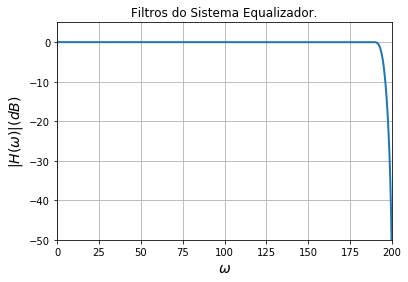

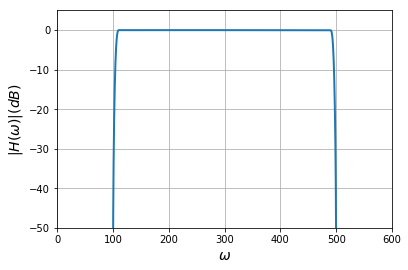

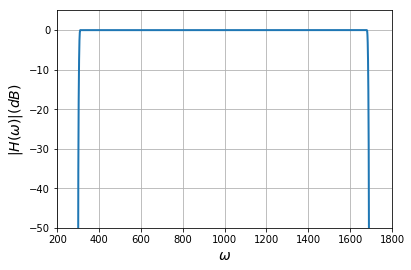

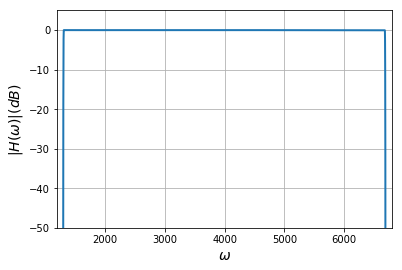

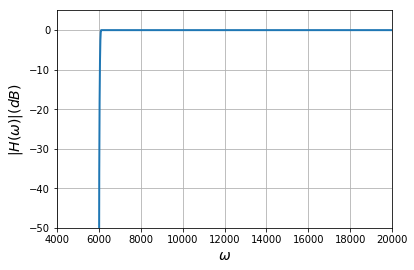

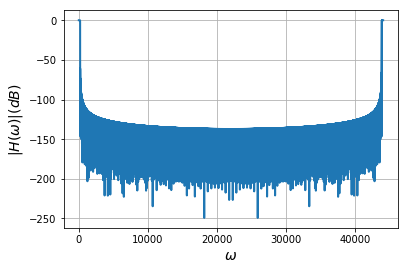

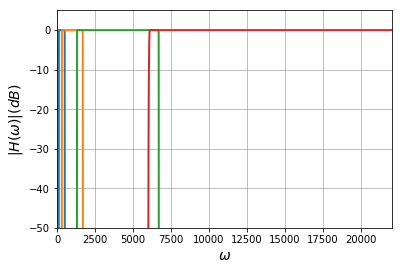

In [48]:
fs1 = 44100 
Ar = 61
wr1 = 190
wp1 = 200
ws = fs1

# Determinação das duas frequências de corte centralizadas na faixa de transição
Tr = abs(wr1-wp1)
wc = (wp1 + wr1)/2

tam_fft = 500000
f = linspace(0, ws, tam_fft)    
[N, beta] = signal.kaiserord(Ar,Tr/(0.5*ws))
h1 = signal.firwin(N,wc,nyq=ws/2,width=Tr,window=('kaiser',beta))
H1 = fft.fft(h1,tam_fft)
mag1 = 20*log10(abs(H1))

clf()
figure(1)
plot(f, mag1,lineWidth=2)
axis([0, 200, -50, 5])
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
title('Filtros do Sistema Equalizador.')
grid(True)

Ar = 60
wr1 = 90
wp1 = 100
wp2 = 500
wr2 = 590
ws = fs1

# Determinação das duas frequências de corte centralizadas na faixa de transição
Tr = min(abs(wr1-wp1),abs(wr2-wp2))
wc1 = wp1 + Tr/2
wc2 = wp2 - Tr/2

tam_fft = 500000
f = linspace(0, ws, tam_fft)    
[N, beta] = signal.kaiserord(Ar,Tr/(0.5*ws))
h2 = signal.firwin(N,[wc1,wc2],nyq=ws/2,width=Tr,window=('kaiser',beta),pass_zero=False)
H2 = fft.fft(h2,tam_fft)
mag2 = 20*log10(abs(H2))

figure(2)
plot(f, mag2,lineWidth=2)
axis([0, 600, -50, 5])
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)

wr1 = 290
wp1 = 300
wp2 = 1690
wr2 = 1700
ws = fs1

# Determinação das duas frequências de corte centralizadas na faixa de transição
Tr = min(abs(wr1-wp1),abs(wr2-wp2))
wc1 = wp1 + Tr/2
wc2 = wp2 - Tr/2

tam_fft = 500000
f = linspace(0, ws, tam_fft)    
[N, beta] = signal.kaiserord(Ar,Tr/(0.5*ws))
h3 = signal.firwin(N,[wc1,wc2],nyq=ws/2,width=Tr,window=('kaiser',beta),pass_zero=False)
H3 = fft.fft(h3,tam_fft)
mag3 = 20*log10(abs(H3))

figure(3)
plot(f, mag3,lineWidth=2)
axis([200, 1800, -50, 5])
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)

wr1 = 1290
wp1 = 1300
wp2 = 6690
wr2 = 6700
ws = fs1

# Determinação das duas frequências de corte centralizadas na faixa de transição
Tr = min(abs(wr1-wp1),abs(wr2-wp2))
wc1 = wp1 + Tr/2
wc2 = wp2 - Tr/2

tam_fft = 500000
f = linspace(0, ws, tam_fft)    
[N, beta] = signal.kaiserord(Ar,Tr/(0.5*ws))
h4 = signal.firwin(N,[wc1,wc2],nyq=ws/2,width=Tr,window=('kaiser',beta),pass_zero=False)
H4 = fft.fft(h4,tam_fft)
mag4 = 20*log10(abs(H4))

figure(4)
plot(f, mag4,lineWidth=2)
axis([1200, 6800, -50, 5])
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)

Ar = 61
wr1 = 6000
wp1 = 6100
ws = fs1

# Determinação das duas frequências de corte centralizadas na faixa de transição
Tr = abs(wr1-wp1)
wc = (wp1 + wr1)/2

tam_fft = 500000
f = linspace(0, ws, tam_fft)    
[N, beta] = signal.kaiserord(Ar,Tr/(0.5*ws))
h5 = signal.firwin(N,wc,nyq=ws/2,width=Tr,window=('kaiser',beta),pass_zero=False)
H5 = fft.fft(h5,tam_fft)
mag5 = 20*log10(abs(H5))

figure(5)
plot(f, mag5,lineWidth=2)
axis([4000, 20000, -50, 5])
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)

figure(6)
plot(f, mag1,lineWidth=2)
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)
show()

plot(f, mag2,lineWidth=2)
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)

plot(f, mag3,lineWidth=2)
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)

plot(f, mag4,lineWidth=2)
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)

plot(f, mag5,lineWidth=2)
axis([0, 22050, -50, 5])
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)

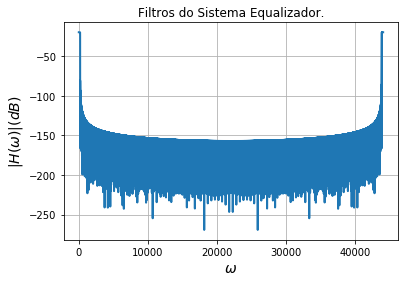

C:\Users\dglsd\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: ComplexWarning: Casting complex values to real discards the imaginary part


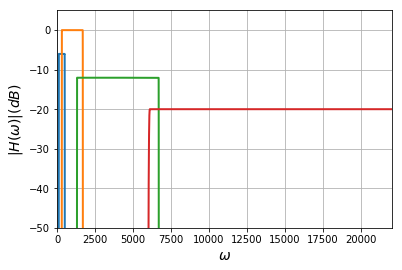

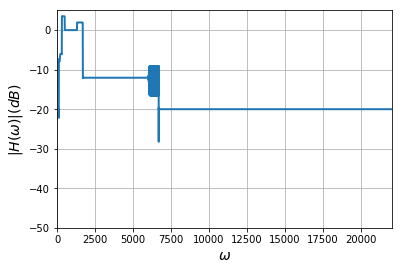

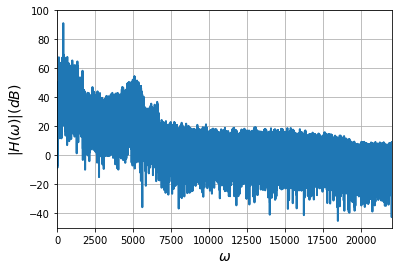

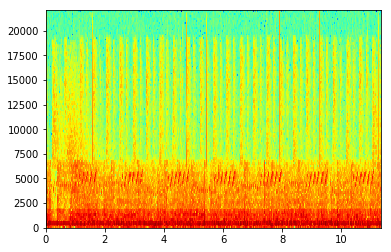

In [45]:
a1 = 0.1
a2 = 0.5
a3 = 1
a4 = 0.25
a5 = 0.1

H1 = H1*a1
H2 = H2*a2
H3 = H3*a3
H4 = H4*a4
H5 = H5*a5
H = H1+H2+H3+H4+H5

mag1 = 20*log10(abs(H1))
mag2 = 20*log10(abs(H2))
mag3 = 20*log10(abs(H3))
mag4 = 20*log10(abs(H4))
mag5 = 20*log10(abs(H5))
mag = 20*log10(abs(H))

clf()
figure(1)
plot(f, mag1,lineWidth=2)
title('Filtros do Sistema Equalizador.')
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)
show()

plot(f, mag2,lineWidth=2)
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)

plot(f, mag3,lineWidth=2)
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)

plot(f, mag4,lineWidth=2)
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)

plot(f, mag5,lineWidth=2)
axis([0, 22050, -50, 5])
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)

figure(2)
plot(f, mag,lineWidth=2)
axis([0, 22050, -50, 5])
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)

ws = fs1
tam_fft = 500000
f = linspace(0, ws, tam_fft)
X1 = fft.fft(x,size(f));
Y = X1*H
magy = 20*log10(abs(Y))
y = float32(fft.ifft(Y))
sound(y,fs1) 

figure(3)
plot(f, magy,lineWidth=2)
axis([0, 22050, -50, 100])
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)
figure(4)
specgram(y,Fs=fs1,cmap='jet');

C:\Users\dglsd\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.fft(a, n, axis)


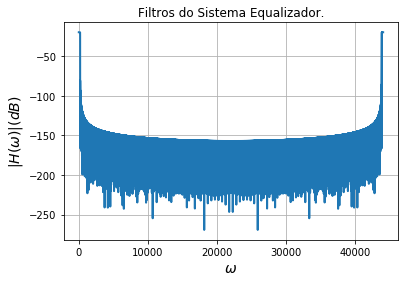

C:\Users\dglsd\Anaconda3\lib\site-packages\ipykernel_launcher.py:152: ComplexWarning: Casting complex values to real discards the imaginary part


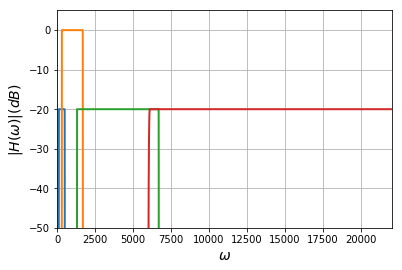

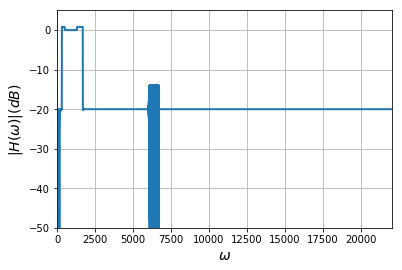

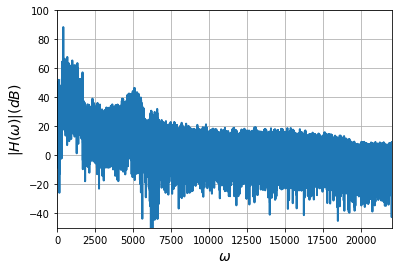

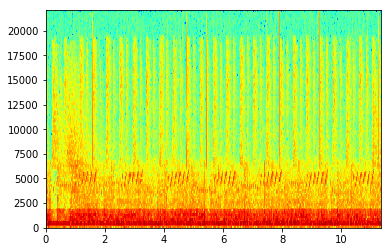

In [51]:
fs1 = 44100 
Ar = 61
wr1 = 190
wp1 = 200
ws = fs1

# Determinação das duas frequências de corte centralizadas na faixa de transição
Tr = abs(wr1-wp1)
wc = (wp1 + wr1)/2

tam_fft = 500000
f = linspace(0, ws, tam_fft)    
[N, beta] = signal.kaiserord(Ar,Tr/(0.5*ws))
h1 = signal.firwin(N,wc,nyq=ws/2,width=Tr,window=('kaiser',beta))
H1 = fft.fft(h1,tam_fft)
mag1 = 20*log10(abs(H1))

Ar = 60
wr1 = 90
wp1 = 100
wp2 = 500
wr2 = 590
ws = fs1

# Determinação das duas frequências de corte centralizadas na faixa de transição
Tr = min(abs(wr1-wp1),abs(wr2-wp2))
wc1 = wp1 + Tr/2
wc2 = wp2 - Tr/2

tam_fft = 500000
f = linspace(0, ws, tam_fft)    
[N, beta] = signal.kaiserord(Ar,Tr/(0.5*ws))
h2 = signal.firwin(N,[wc1,wc2],nyq=ws/2,width=Tr,window=('kaiser',beta),pass_zero=False)
H2 = fft.fft(h2,tam_fft)
mag2 = 20*log10(abs(H2))

wr1 = 290
wp1 = 300
wp2 = 1690
wr2 = 1700
ws = fs1

# Determinação das duas frequências de corte centralizadas na faixa de transição
Tr = min(abs(wr1-wp1),abs(wr2-wp2))
wc1 = wp1 + Tr/2
wc2 = wp2 - Tr/2

tam_fft = 500000
f = linspace(0, ws, tam_fft)    
[N, beta] = signal.kaiserord(Ar,Tr/(0.5*ws))
h3 = signal.firwin(N,[wc1,wc2],nyq=ws/2,width=Tr,window=('kaiser',beta),pass_zero=False)
H3 = fft.fft(h3,tam_fft)
mag3 = 20*log10(abs(H3))

wr1 = 1290
wp1 = 1300
wp2 = 6690
wr2 = 6700
ws = fs1

# Determinação das duas frequências de corte centralizadas na faixa de transição
Tr = min(abs(wr1-wp1),abs(wr2-wp2))
wc1 = wp1 + Tr/2
wc2 = wp2 - Tr/2

tam_fft = 500000
f = linspace(0, ws, tam_fft)    
[N, beta] = signal.kaiserord(Ar,Tr/(0.5*ws))
h4 = signal.firwin(N,[wc1,wc2],nyq=ws/2,width=Tr,window=('kaiser',beta),pass_zero=False)
H4 = fft.fft(h4,tam_fft)
mag4 = 20*log10(abs(H4))

Ar = 61
wr1 = 6000
wp1 = 6100
ws = fs1

# Determinação das duas frequências de corte centralizadas na faixa de transição
Tr = abs(wr1-wp1)
wc = (wp1 + wr1)/2

tam_fft = 500000
f = linspace(0, ws, tam_fft)    
[N, beta] = signal.kaiserord(Ar,Tr/(0.5*ws))
h5 = signal.firwin(N,wc,nyq=ws/2,width=Tr,window=('kaiser',beta),pass_zero=False)
H5 = fft.fft(h5,tam_fft)
mag5 = 20*log10(abs(H5))

a1 = 0.1
a2 = 0.1
a3 = 1
a4 = 0.1
a5 = 0.1

H1 = H1*a1
H2 = H2*a2
H3 = H3*a3
H4 = H4*a4
H5 = H5*a5
H = H1+H2+H3+H4+H5

mag1 = 20*log10(abs(H1))
mag2 = 20*log10(abs(H2))
mag3 = 20*log10(abs(H3))
mag4 = 20*log10(abs(H4))
mag5 = 20*log10(abs(H5))
mag = 20*log10(abs(H))

clf()
figure(1)
plot(f, mag1,lineWidth=2)
title('Filtros do Sistema Equalizador.')
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)
show()

plot(f, mag2,lineWidth=2)
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)

plot(f, mag3,lineWidth=2)
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)

plot(f, mag4,lineWidth=2)
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)

plot(f, mag5,lineWidth=2)
axis([0, 22050, -50, 5])
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)

figure(2)
plot(f, mag,lineWidth=2)
axis([0, 22050, -50, 5])
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)

ws = fs1
tam_fft = 500000
f = linspace(0, ws, tam_fft)
X1 = fft.fft(x,size(f));
Y = X1*H
magy = 20*log10(abs(Y))
y = float32(fft.ifft(Y))
sound(y,fs1) 

figure(3)
plot(f, magy,lineWidth=2)
axis([0, 22050, -50, 100])
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)
figure(4)
specgram(y,Fs=fs1,cmap='jet');

C:\Users\dglsd\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.fft(a, n, axis)


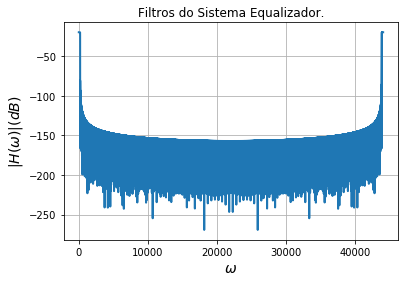

C:\Users\dglsd\Anaconda3\lib\site-packages\ipykernel_launcher.py:152: ComplexWarning: Casting complex values to real discards the imaginary part


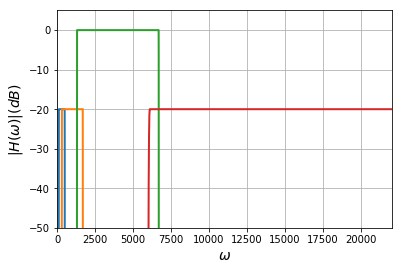

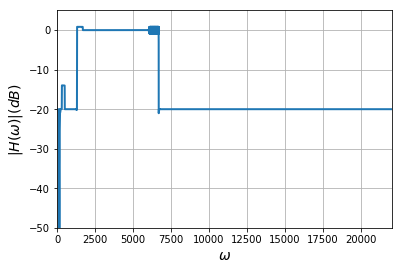

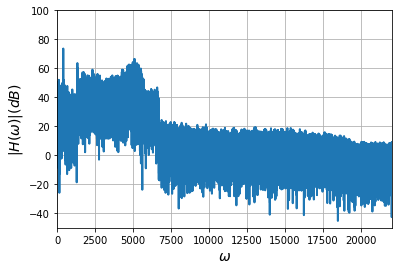

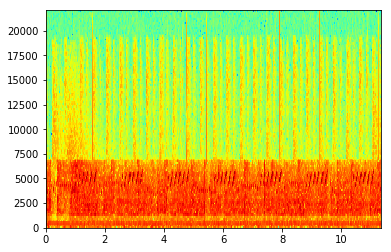

In [52]:
fs1 = 44100 
Ar = 61
wr1 = 190
wp1 = 200
ws = fs1

# Determinação das duas frequências de corte centralizadas na faixa de transição
Tr = abs(wr1-wp1)
wc = (wp1 + wr1)/2

tam_fft = 500000
f = linspace(0, ws, tam_fft)    
[N, beta] = signal.kaiserord(Ar,Tr/(0.5*ws))
h1 = signal.firwin(N,wc,nyq=ws/2,width=Tr,window=('kaiser',beta))
H1 = fft.fft(h1,tam_fft)
mag1 = 20*log10(abs(H1))

Ar = 60
wr1 = 90
wp1 = 100
wp2 = 500
wr2 = 590
ws = fs1

# Determinação das duas frequências de corte centralizadas na faixa de transição
Tr = min(abs(wr1-wp1),abs(wr2-wp2))
wc1 = wp1 + Tr/2
wc2 = wp2 - Tr/2

tam_fft = 500000
f = linspace(0, ws, tam_fft)    
[N, beta] = signal.kaiserord(Ar,Tr/(0.5*ws))
h2 = signal.firwin(N,[wc1,wc2],nyq=ws/2,width=Tr,window=('kaiser',beta),pass_zero=False)
H2 = fft.fft(h2,tam_fft)
mag2 = 20*log10(abs(H2))

wr1 = 290
wp1 = 300
wp2 = 1690
wr2 = 1700
ws = fs1

# Determinação das duas frequências de corte centralizadas na faixa de transição
Tr = min(abs(wr1-wp1),abs(wr2-wp2))
wc1 = wp1 + Tr/2
wc2 = wp2 - Tr/2

tam_fft = 500000
f = linspace(0, ws, tam_fft)    
[N, beta] = signal.kaiserord(Ar,Tr/(0.5*ws))
h3 = signal.firwin(N,[wc1,wc2],nyq=ws/2,width=Tr,window=('kaiser',beta),pass_zero=False)
H3 = fft.fft(h3,tam_fft)
mag3 = 20*log10(abs(H3))

wr1 = 1290
wp1 = 1300
wp2 = 6690
wr2 = 6700
ws = fs1

# Determinação das duas frequências de corte centralizadas na faixa de transição
Tr = min(abs(wr1-wp1),abs(wr2-wp2))
wc1 = wp1 + Tr/2
wc2 = wp2 - Tr/2

tam_fft = 500000
f = linspace(0, ws, tam_fft)    
[N, beta] = signal.kaiserord(Ar,Tr/(0.5*ws))
h4 = signal.firwin(N,[wc1,wc2],nyq=ws/2,width=Tr,window=('kaiser',beta),pass_zero=False)
H4 = fft.fft(h4,tam_fft)
mag4 = 20*log10(abs(H4))

Ar = 61
wr1 = 6000
wp1 = 6100
ws = fs1

# Determinação das duas frequências de corte centralizadas na faixa de transição
Tr = abs(wr1-wp1)
wc = (wp1 + wr1)/2

tam_fft = 500000
f = linspace(0, ws, tam_fft)    
[N, beta] = signal.kaiserord(Ar,Tr/(0.5*ws))
h5 = signal.firwin(N,wc,nyq=ws/2,width=Tr,window=('kaiser',beta),pass_zero=False)
H5 = fft.fft(h5,tam_fft)
mag5 = 20*log10(abs(H5))

a1 = 0.1
a2 = 0.1
a3 = 0.1
a4 = 1
a5 = 0.1

H1 = H1*a1
H2 = H2*a2
H3 = H3*a3
H4 = H4*a4
H5 = H5*a5
H = H1+H2+H3+H4+H5

mag1 = 20*log10(abs(H1))
mag2 = 20*log10(abs(H2))
mag3 = 20*log10(abs(H3))
mag4 = 20*log10(abs(H4))
mag5 = 20*log10(abs(H5))
mag = 20*log10(abs(H))

clf()
figure(1)
plot(f, mag1,lineWidth=2)
title('Filtros do Sistema Equalizador.')
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)
show()

plot(f, mag2,lineWidth=2)
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)

plot(f, mag3,lineWidth=2)
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)

plot(f, mag4,lineWidth=2)
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)

plot(f, mag5,lineWidth=2)
axis([0, 22050, -50, 5])
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)

figure(2)
plot(f, mag,lineWidth=2)
axis([0, 22050, -50, 5])
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)

ws = fs1
tam_fft = 500000
f = linspace(0, ws, tam_fft)
X1 = fft.fft(x,size(f));
Y = X1*H
magy = 20*log10(abs(Y))
y = float32(fft.ifft(Y))
sound(y,fs1) 

figure(3)
plot(f, magy,lineWidth=2)
axis([0, 22050, -50, 100])
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)| (dB)$',fontsize=14)
grid(True)
figure(4)
specgram(y,Fs=fs1,cmap='jet');

Como pode-se notar, é possível separar quais faixas de frequências que deseja-se escutar baseado nos pesos que multiplicam os filtros.

Algumas vezes é possível escutar apenas as frequências graves quando o peso é 1 apenas para os dois primeiros filtros. Ou frequências intermediárias quando o peso é 1 para o terceiro ou o quarto filtro. É nessa hora justamente que é possível escutar nitidamente o som do pássaro já que sua frequência é em torno dessa faixa intermediária que é de 3000Hz à 6000Hz

Por fim, caso deseja-se escutar as frequências mais agudas, basta deixar o quinto filtro, que é o passa-alta, com o peso 1, enquanto os outros filtros ficam com pesos menores.